In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [13]:
#import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import randint
from scipy import stats
from statsmodels.stats import weightstats as stests

In [7]:
#number of missing values and percentage of missing values
missing_values = ['NULL', 'NA', 'NaN']
df = pd.read_csv('/content/drive/My Drive/stats_project/GSOEP9402.csv', na_values = missing_values)
num_of_missing_values = df.isnull().sum()
total = 0
for value in num_of_missing_values:
  total += value
missing_percent = (total / (len(df) * 12)) * 100
print("Number of missing values: \n", num_of_missing_values)
print("Percentage of missing values: ", missing_percent, "%")


Number of missing values: 
 Unnamed: 0      0
school         21
birthyear      23
gender         20
kids           21
parity         19
income         20
size           20
state          21
marital        23
meducation     18
memployment    22
year           24
dtype: int64
Percentage of missing values:  3.111111111111111 %


In [8]:
#display some missing values
missing_values = ['NULL', 'NA', 'NaN']
df = pd.read_csv('/content/drive/My Drive/stats_project/GSOEP9402.csv', na_values = missing_values)
df[54:71]

,Unnamed: 0,school,birthyear,gender,kids,parity,income,size,state,marital,meducation,memployment,year
54,55,Gymnasium,1987.0,female,NaN,1.0,79437.00623,4.0,Niedersachsen,married,12.0,none,2001.0
55,56,Hauptschule,NaN,male,1.0,1.0,67575.01642,3.0,Niedersachsen,married,9.0,fulltime,2002.0
56,57,Hauptschule,1980.0,male,2.0,2.0,68578.18702,4.0,Niedersachsen,married,11.5,parttime,NaN
57,58,Realschule,1983.0,female,2.0,2.0,73933.85018,4.0,Niedersachsen,married,10.5,parttime,1997.0
58,59,Hauptschule,1980.0,female,2.0,1.0,60686.95237,4.0,Niedersachsen,married,10.5,parttime,1994.0
59,60,Realschule,1986.0,female,1.0,1.0,76634.98738,3.0,Niedersachsen,married,9.0,none,2000.0
60,61,NaN,1982.0,male,2.0,1.0,59684.86808,4.0,Niedersachsen,married,11.5,none,1996.0
61,62,Realschule,1985.0,male,2.0,2.0,65546.19029,4.0,Niedersachsen,married,11.5,none,1999.0
62,63,Realschule,1983.0,male,1.0,1.0,61663.97618,3.0,Niedersachsen,married,9.0,none,1997.0
63,64,Realschule,1981.0,female,2.0,1.0,103631.37690,4.0,Niedersachsen,married,11.5,none,1995.0


In [9]:
#variance and mean of numerical variables before filling missing values
for col in df:
  try:
    print("mean of ",col,":", df[col].mean())
    print("variance of ", col, ":", df[col].var())
  except:
     pass

mean of  Unnamed: 0 : 338.0
variance of  Unnamed: 0 : 38025.0
mean of  birthyear : 1983.9616564417179
variance of  birthyear : 6.93401138409048
mean of  kids : 2.5122324159021407
variance of  kids : 1.166006340999664
mean of  parity : 1.7545731707317074
variance of  parity : 0.7320401228821504
mean of  income : 71295.24029567944
variance of  income : 1107365667.524313
mean of  size : 4.251908396946565
variance of  size : 1.2927142423605773
mean of  meducation : 11.441400304414003
variance of  meducation : 4.799533402012112
mean of  year : 1997.995391705069
variance of  year : 6.887671038638762


In [14]:
#imputing missing values and displaying the data after imputing
for col in df:
  try:
    if df[col].dtype == int or df[col].dtype == float :
      if col == "birthyear":
        df[col].fillna(df['year'] - 14, inplace = True)
      elif col == "year":
        df[col].fillna(df['birthyear'] + 14, inplace = True)
      elif col == "income":
        df[col].fillna(df[col].mean(), inplace = True)
      else:
        df[col].fillna(round(df[col].median()), inplace = True)
    else:
      df[col].fillna(df[col].mode()[0], inplace = True)
    df[col].fillna(round(df[col].median()),inplace = True)
  except:
    pass
print(df.isnull().sum())
df.to_csv('/content/drive/My Drive/stats_project/GSOEP9402_after_imputing.csv', index = False)
df[54:71]

Unnamed: 0     0
school         0
birthyear      0
gender         0
kids           0
parity         0
income         0
size           0
state          0
marital        0
meducation     0
memployment    0
year           0
dtype: int64


,Unnamed: 0,school,birthyear,gender,kids,parity,income,size,state,marital,meducation,memployment,year
54,55,Gymnasium,1987.0,female,2.0,1.0,79437.00623,4.0,Niedersachsen,married,12.0,none,2001.0
55,56,Hauptschule,1988.0,male,1.0,1.0,67575.01642,3.0,Niedersachsen,married,9.0,fulltime,2002.0
56,57,Hauptschule,1980.0,male,2.0,2.0,68578.18702,4.0,Niedersachsen,married,11.5,parttime,1994.0
57,58,Realschule,1983.0,female,2.0,2.0,73933.85018,4.0,Niedersachsen,married,10.5,parttime,1997.0
58,59,Hauptschule,1980.0,female,2.0,1.0,60686.95237,4.0,Niedersachsen,married,10.5,parttime,1994.0
59,60,Realschule,1986.0,female,1.0,1.0,76634.98738,3.0,Niedersachsen,married,9.0,none,2000.0
60,61,Gymnasium,1982.0,male,2.0,1.0,59684.86808,4.0,Niedersachsen,married,11.5,none,1996.0
61,62,Realschule,1985.0,male,2.0,2.0,65546.19029,4.0,Niedersachsen,married,11.5,none,1999.0
62,63,Realschule,1983.0,male,1.0,1.0,61663.97618,3.0,Niedersachsen,married,9.0,none,1997.0
63,64,Realschule,1981.0,female,2.0,1.0,103631.37690,4.0,Niedersachsen,married,11.5,none,1995.0


In [15]:
#variance and mean after filling missing values
df = pd.read_csv('/content/drive/My Drive/stats_project/GSOEP9402_after_imputing.csv')
for col in df:
  try:
    print("mean of",col,":", df[col].mean())
    print("variance of", col, ":", df[col].var())
  except:
     pass

mean of Unnamed: 0 : 338.0
variance of Unnamed: 0 : 38025.0
mean of birthyear : 1983.962962962963
variance of birthyear : 6.917023848774609
mean of kids : 2.4962962962962965
variance of kids : 1.1375975381910217
mean of parity : 1.7614814814814814
variance of parity : 0.7130541817782183
mean of income : 71295.24029567941
variance of income : 1074506152.1675084
mean of size : 4.2444444444444445
variance of size : 1.2561819980217583
mean of meducation : 11.42962962962963
variance of meducation : 4.676420485767675
mean of year : 1997.962962962963
variance of year : 6.917023848774609


In [16]:
df = pd.read_csv("/content/drive/My Drive/stats_project/GSOEP9402_after_imputing.csv")
df

,Unnamed: 0,school,birthyear,gender,kids,parity,income,size,state,marital,meducation,memployment,year
0,1,Gymnasium,1981.0,female,2.0,2.0,35160.11349,4.0,Berlin,married,14.5,none,1995.0
1,2,Gymnasium,1981.0,female,2.0,2.0,65748.34527,3.0,Nordrhein-Westfalen,married,10.5,parttime,1995.0
2,3,Gymnasium,1980.0,female,3.0,3.0,120962.35650,3.0,Berlin,married,12.0,parttime,1994.0
3,4,Gymnasium,1984.0,female,1.0,1.0,60100.57230,3.0,Berlin,married,10.5,parttime,1998.0
4,5,Realschule,1982.0,male,4.0,4.0,34828.95184,4.0,Berlin,divorced,10.0,fulltime,1996.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,671,Gymnasium,1986.0,female,3.0,1.0,163592.93050,5.0,Schleswig-Holstein,married,12.0,parttime,2000.0
671,672,Hauptschule,1987.0,female,2.0,2.0,13790.68677,2.0,Rheinland-Pfalz/Saarland,divorced,15.0,parttime,2001.0
672,673,Hauptschule,1984.0,male,5.0,1.0,63503.01468,6.0,Niedersachsen,married,12.0,none,1998.0
673,674,Gymnasium,1987.0,male,1.0,1.0,47978.26707,3.0,Niedersachsen,married,11.5,none,2001.0


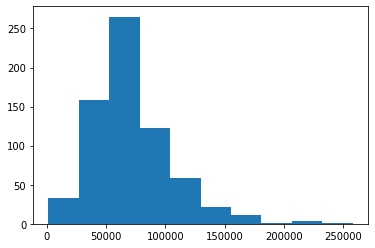

In [17]:
plt.hist(df['income'])
plt.show()

In [18]:
lower_bound = 0.1
upper_bound = 0.95
outliers = df.income.quantile([lower_bound, upper_bound])
print(outliers)

0.10     36329.095606
0.95    131283.151540
Name: income, dtype: float64


In [21]:
accepted_income = (df.income.values > outliers.loc[lower_bound]) & (df.income.values < outliers.loc[upper_bound])
median = np.median(df.income[accepted_income])
rejected_income = ~(accepted_income)
df.income[rejected_income] = median     #replace outliers with median of accepted income
median

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


68799.07502999999

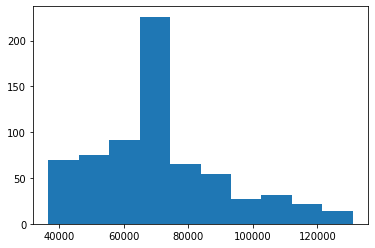

In [22]:
df.to_csv("/content/drive/My Drive/stats_project/GSOEP9402_without_outliers.csv", index = False)
plt.hist(df['income'])
plt.show()

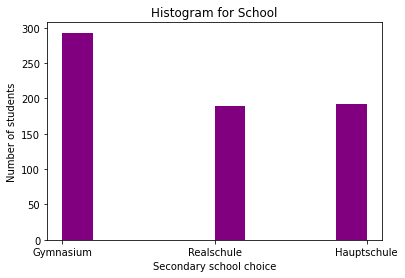

In [24]:
plt.hist(df["school"], color = 'purple')
plt.xlabel("Secondary school choice")
plt.ylabel("Number of students")
plt.title("Histogram for School")
plt.show()

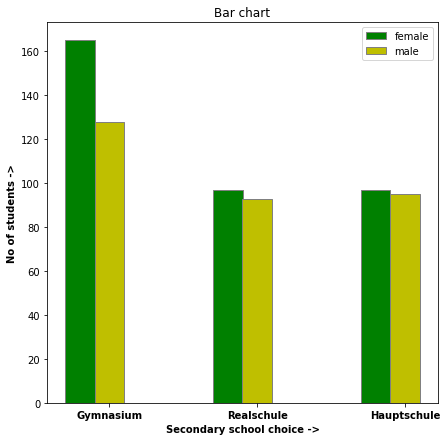

In [25]:
#bar chart
num_gym_g = 0
num_real_g = 0
num_haup_g = 0
num_gym_b = 0
num_real_b = 0
num_haup_b = 0
for i, value in enumerate(df['gender']):
  if value == 'female':
    if df['school'].iloc[i] == 'Gymnasium':
      num_gym_g += 1
    if df['school'].iloc[i] == 'Realschule':
      num_real_g += 1
    if df['school'].iloc[i] == 'Hauptschule':
      num_haup_g += 1
  else:
    if df['school'].iloc[i] == 'Gymnasium':
      num_gym_b += 1
    if df['school'].iloc[i] == 'Realschule':
      num_real_b += 1
    if df['school'].iloc[i] == 'Hauptschule':
      num_haup_b += 1
d = {'Gymnasium' : [num_gym_g, num_gym_b], 'Realschule': [num_real_g, num_real_b], 'Hauptschule': [num_haup_g, num_haup_b]}
barWidth = 0.20
fig = plt.subplots(figsize =(7,7)) 
girls = [num_gym_g, num_real_g, num_haup_g] 
boys = [num_gym_b, num_real_b, num_haup_b]  
br1 = np.arange(len(girls))  
br2 = [x + barWidth for x in br1]  
plt.bar(br1, girls, color ='g', width = barWidth, 
        edgecolor ='grey', label = "female") 
plt.bar(br2, boys, color ='y', width = barWidth, 
        edgecolor ='grey', label = "male")  
plt.xlabel('Secondary school choice ->', fontweight ='bold') 
plt.ylabel('No of students ->', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(girls))], 
           ['Gymnasium', 'Realschule', 'Hauptschule'], fontweight = "bold") 
plt.legend(loc='best')   
plt.title("Bar chart")
plt.show() 

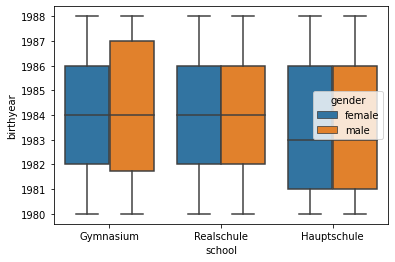

In [26]:
#box plot
sns.boxplot(x = 'school', y = 'birthyear', hue = 'gender', data = df)
plt.show()

In [27]:
#Normalization
columns=['income', 'kids', 'parity', 'meducation', 'size', 'year', 'birthyear']
df_std = df.copy()
    
for cols in columns:
    df_std[cols] = (df_std[cols] - df_std[cols].mean()) / (df_std[cols].std()) #z-score
    
print(df_std)

     Unnamed: 0       school  birthyear  ... meducation  memployment      year
0             1    Gymnasium  -1.126592  ...   1.419822         none -1.126592
1             2    Gymnasium  -1.126592  ...  -0.429886     parttime -1.126592
2             3    Gymnasium  -1.506817  ...   0.263755     parttime -1.506817
3             4    Gymnasium   0.014082  ...  -0.429886     parttime  0.014082
4             5   Realschule  -0.746367  ...  -0.661099     fulltime -0.746367
..          ...          ...        ...  ...        ...          ...       ...
670         671    Gymnasium   0.774532  ...   0.263755     parttime  0.774532
671         672  Hauptschule   1.154757  ...   1.651036     parttime  1.154757
672         673  Hauptschule   0.014082  ...   0.263755         none  0.014082
673         674    Gymnasium   1.154757  ...   0.032541         none  1.154757
674         675   Realschule   1.154757  ...   0.032541     parttime  1.154757

[675 rows x 13 columns]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

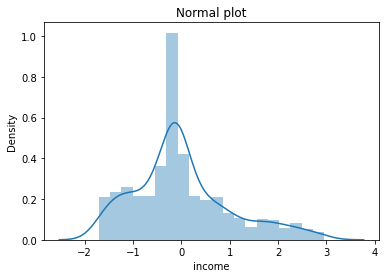

<Figure size 432x288 with 0 Axes>

In [28]:
#plots after normalization
sns.distplot(df_std["income"])
plt.title("Normal plot")
plt.figure()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

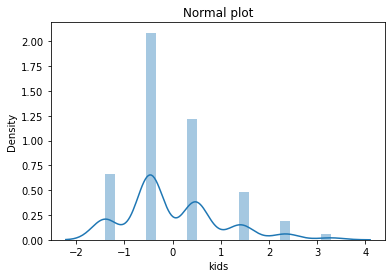

<Figure size 432x288 with 0 Axes>

In [29]:
sns.distplot(df_std['kids'])
plt.title("Normal plot")
plt.figure()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

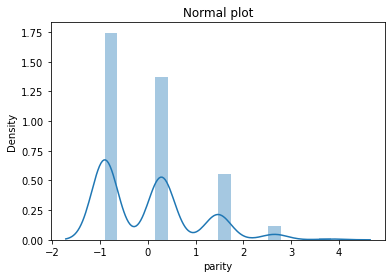

<Figure size 432x288 with 0 Axes>

In [30]:
sns.distplot(df_std['parity'])
plt.title("Normal plot")
plt.figure()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

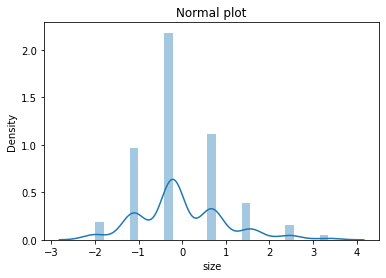

<Figure size 432x288 with 0 Axes>

In [31]:
sns.distplot(df_std['size'])
plt.title("Normal plot")
plt.figure()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

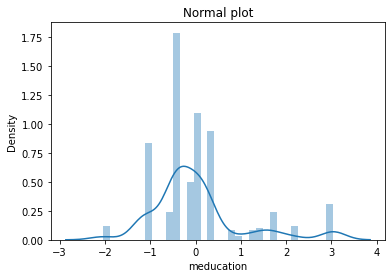

<Figure size 432x288 with 0 Axes>

In [32]:
sns.distplot(df_std['meducation'])
plt.title("Normal plot")
plt.figure()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

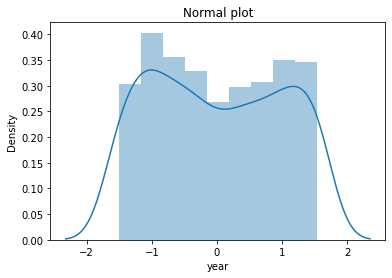

<Figure size 432x288 with 0 Axes>

In [33]:
sns.distplot(df_std['year'])
plt.title("Normal plot")
plt.figure()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

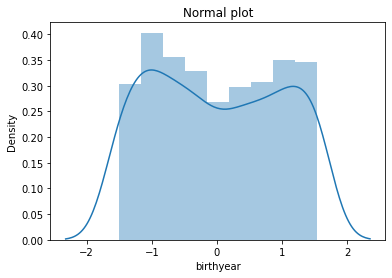

<Figure size 432x288 with 0 Axes>

In [34]:
sns.distplot(df_std['birthyear'])
plt.title("Normal plot")
plt.figure()

In [37]:
#mean and variance afte rnormalization
print("variance\n", df_std.var())
print("mean\n", abs(round(df_std.mean())))

variance
 Unnamed: 0    38025.0
birthyear         1.0
kids              1.0
parity            1.0
income            1.0
size              1.0
meducation        1.0
year              1.0
dtype: float64
mean
 Unnamed: 0    338.0
birthyear       0.0
kids            0.0
parity          0.0
income          0.0
size            0.0
meducation      0.0
year            0.0
dtype: float64


In [38]:
df_std.to_csv('/content/drive/My Drive/stats_project/GSOEP9402_after_normalization.csv', index = False)
df_std

,Unnamed: 0,school,birthyear,gender,kids,parity,income,size,state,marital,meducation,memployment,year
0,1,Gymnasium,-1.126592,female,-0.465315,0.282463,-0.118563,-0.218099,Berlin,married,1.419822,none,-1.126592
1,2,Gymnasium,-1.126592,female,-0.465315,0.282463,-0.269488,-1.110323,Nordrhein-Westfalen,married,-0.429886,parttime,-1.126592
2,3,Gymnasium,-1.506817,female,0.472260,1.466700,2.462046,-1.110323,Berlin,married,0.263755,parttime,-1.506817
3,4,Gymnasium,0.014082,female,-1.402889,-0.901775,-0.548894,-1.110323,Berlin,married,-0.429886,parttime,0.014082
4,5,Realschule,-0.746367,male,1.409834,2.650937,-0.118563,-0.218099,Berlin,divorced,-0.661099,fulltime,-0.746367
...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,671,Gymnasium,0.774532,female,0.472260,-0.901775,-0.118563,0.674125,Schleswig-Holstein,married,0.263755,parttime,0.774532
671,672,Hauptschule,1.154757,female,-0.465315,0.282463,-0.118563,-2.002546,Rheinland-Pfalz/Saarland,divorced,1.651036,parttime,1.154757
672,673,Hauptschule,0.014082,male,2.347408,-0.901775,-0.380569,1.566348,Niedersachsen,married,0.263755,none,0.014082
673,674,Gymnasium,1.154757,male,-1.402889,-0.901775,-1.148605,-1.110323,Niedersachsen,married,0.032541,none,1.154757


In [40]:
df = pd.read_csv('/content/drive/My Drive/stats_project/GSOEP9402_without_outliers.csv')


In [41]:
#hypothesis testing
import scipy.stats as st
from scipy.stats import zscore

In [44]:
sampdata=df['income'].sample(40)
N=100
meansampdata=sampdata.mean()
hypmean=70000
standpopulation=np.std(df['income'])

In [45]:
z=(meansampdata-hypmean)/(standpopulation/math.sqrt(N))
pval = st.norm.cdf(z)

if pval<=0.05:
    print("reject Null hypothesis")
else:
    print("H0 is plausible or Fail to reject Null hypothesis")
pval

print(standpopulation)
print(meansampdata)
print(z)

H0 is plausible or Fail to reject Null hypothesis
20198.570549868855
70417.21488928398
0.20655664134939727


In [46]:
#correlation
corr = df.corr()
corr

,Unnamed: 0,birthyear,kids,parity,income,size,meducation,year
Unnamed: 0,1.000000,0.059205,-0.073013,-0.084806,0.005477,-0.041186,-0.032199,0.059205
birthyear,0.059205,1.000000,0.023488,0.046121,0.183256,0.003579,0.081063,1.000000
kids,-0.073013,0.023488,1.000000,0.543465,0.084092,0.801912,-0.078431,0.023488
parity,-0.084806,0.046121,0.543465,1.000000,0.133153,0.309387,-0.066893,0.046121
income,0.005477,0.183256,0.084092,0.133153,1.000000,0.159274,0.249289,0.183256
size,-0.041186,0.003579,0.801912,0.309387,0.159274,1.000000,-0.012175,0.003579
meducation,-0.032199,0.081063,-0.078431,-0.066893,0.249289,-0.012175,1.000000,0.081063
year,0.059205,1.000000,0.023488,0.046121,0.183256,0.003579,0.081063,1.000000


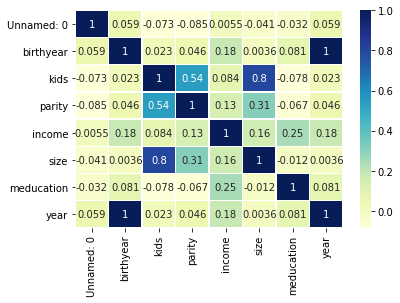

In [47]:
sns.heatmap(corr, annot = True, cmap = "YlGnBu", linewidths = 0.5)

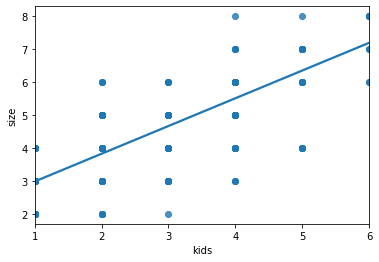

In [49]:
sns.regplot(x = df['kids'],y = df['size'], ci = None)

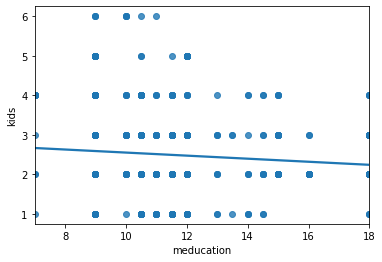

In [50]:
sns.regplot(x = df['meducation'], y = df['kids'], ci = None)

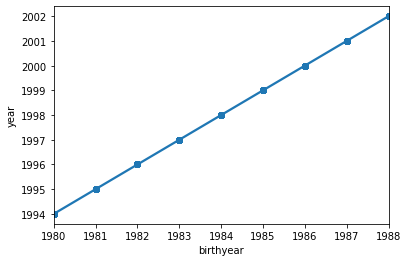

In [51]:
sns.regplot(x = df['birthyear'], y = df['year'], ci = None)

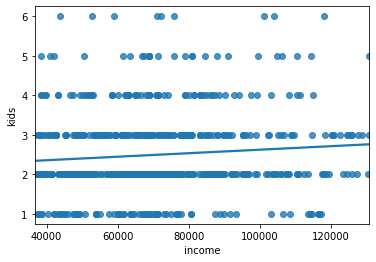

In [52]:
sns.regplot(x = df['income'], y = df['kids'], ci = None)

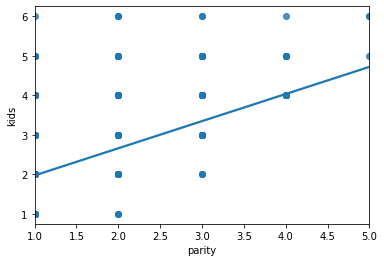

In [53]:
sns.regplot(x = df['parity'], y = df['kids'], ci = None) 

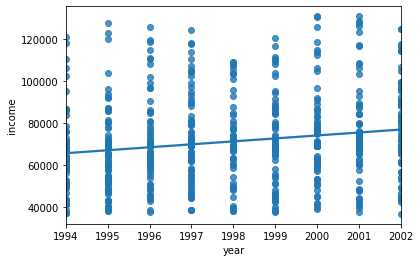

In [54]:
sns.regplot(x = df['year'], y = df['income'], ci = None)

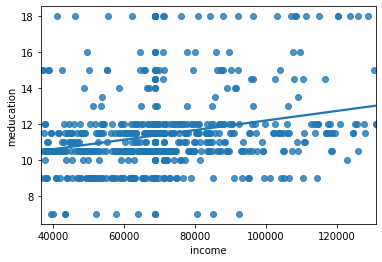

In [55]:
sns.regplot(x = df['income'], y = df['meducation'], ci = None)

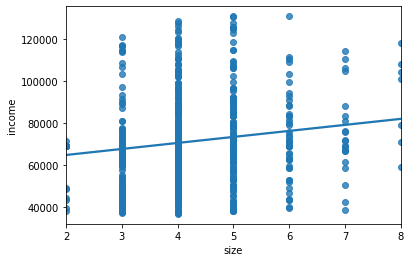

In [56]:
sns.regplot(x = df['size'], y = df['income'], ci = None)